## Ford Go Bike Data 

### Table of Contents
<ul>
<li><a href="#wrangling">Accessing data</a></li>
<li><a href="#wrangling">Cleaning data</a></li> 
<li><a href="#eda">Univariate Data Analysis</a></li>
<li><a href="#eda">Bivariate Data Analysis</a></li>
<li><a href="#eda">Multivariate Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

#### Introduction
This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area where the trips has been started in the month of January.
My goal is to  use univariate, bivariate, and multivariate plots to explore many relationships in the data sets. 


In [1]:
# Used this cell to set up import statements for all of the packages that will be used.
# Included a 'magic word' so that our visualizations are plotted inline with the notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loaded our data and printed out a few lines. 
bike = pd.read_csv(r'C:\Users\sagat\Downloads\Nanodegree\201801-fordgobike-tripdata.csv') 
bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No


In [3]:
#### Show the Info of the bike Dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


#### Data Cleaning 
    - Gender of members and the birth_year has missing values
    - Also the start time and end time are objects. We will be converting it to datetime. 
    - Changing duration in secs to mins for easier understanding
    - Calculating an approximate age of each members. Not we can't be exact because we only have the birth year. 
    - Unwanted columns can also be removed 

In [4]:
#create copies of the data frame
bike_copy =  bike.copy()   

Define 
1. Gender of members and the birth_year has missing values

Code

In [5]:
#drop rows with missing values
bike_copy = bike_copy.dropna()

Test code

In [6]:
# test to see it worked
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86963 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               86963 non-null int64
start_time                 86963 non-null object
end_time                   86963 non-null object
start_station_id           86963 non-null int64
start_station_name         86963 non-null object
start_station_latitude     86963 non-null float64
start_station_longitude    86963 non-null float64
end_station_id             86963 non-null int64
end_station_name           86963 non-null object
end_station_latitude       86963 non-null float64
end_station_longitude      86963 non-null float64
bike_id                    86963 non-null int64
user_type                  86963 non-null object
member_birth_year          86963 non-null float64
member_gender              86963 non-null object
bike_share_for_all_trip    86963 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.3+ MB


Define
2. Also the start time and end time are objects, we will be converting it to datetime. 

Code for start time

In [7]:
# import datetime object 
from datetime import datetime

# to convert each string start time to a date creating a for loop
start_times = []

for date in bike_copy['start_time']:
    start_times.append(datetime.strptime(date, "%Y-%m-%d %H:%M:%S.%f").date())
    
    
bike_copy['start_time'] = start_times

Test code

In [8]:
# test to make sure it worked
bike_copy['start_time'].sample(2)

9773     2018-01-29
24963    2018-01-25
Name: start_time, dtype: object

Code for end time

In [9]:
# to convert each string end time to a date creating a for loop
end_times = []

for date in bike_copy['end_time']:
    end_times.append(datetime.strptime(date, "%Y-%m-%d %H:%M:%S.%f").date())
    
    
bike_copy['end_time'] = end_times

Test code

In [10]:
# test to make sure it worked
bike_copy['end_time'].sample(2)

80886    2018-01-06
18116    2018-01-27
Name: end_time, dtype: object

Define
3. Changing duration in secs to mins for easier understanding

Code

In [11]:
# Convering Duration in seconds to minutes and storing it in duration_min 
bike_copy['duration_min'] = bike_copy['duration_sec'] / 60

#Dropping the duration in seconds column
bike_copy.drop('duration_sec' , axis = 1 , inplace = True)

Test code

In [12]:
bike_copy.head(2)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,2018-01-31,2018-02-01,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,1254.733333
1,2018-01-31,2018-02-01,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,1423.700000


Define
4. Calculating an approximate age of each members. 

Code

In [13]:
# Calculating the age of the members and storing the values in member_age
now = 2019
bike_copy['member_age'] = now - bike_copy['member_birth_year']

Test

In [14]:
bike_copy.head(2)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age
0,2018-01-31,2018-02-01,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,1254.733333,33.0
1,2018-01-31,2018-02-01,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,1423.700000,NaN


Define
4. Unwanted columns can also be removed

Code

In [17]:
# Removing unwanted columns 
bike_copy.drop(['start_station_name','start_station_latitude','start_station_longitude', 'end_station_name','end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

Test

In [18]:
# test to make sure it worked
bike_copy

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age
0,2018-01-31,2018-02-01,120,285,2765,Subscriber,1986.0,Male,No,1254.733333,33.0
1,2018-01-31,2018-02-01,15,15,2815,Customer,NaN,NaN,No,1423.700000,NaN
2,2018-01-31,2018-02-01,304,296,3039,Customer,1996.0,Male,No,1192.933333,23.0
3,2018-01-31,2018-02-01,75,47,321,Customer,NaN,NaN,No,1017.933333,NaN
4,2018-01-31,2018-02-01,74,19,617,Subscriber,1991.0,Male,No,666.100000,28.0
5,2018-01-31,2018-02-01,236,160,1306,Customer,NaN,NaN,No,107.950000,NaN
6,2018-01-31,2018-02-01,110,134,3571,Subscriber,1988.0,Male,No,7.550000,31.0
7,2018-01-31,2018-01-31,81,93,1403,Subscriber,1980.0,Male,No,3.000000,39.0
8,2018-01-31,2018-01-31,134,4,3675,Subscriber,1987.0,Male,Yes,16.600000,32.0
9,2018-01-31,2018-01-31,305,317,1453,Subscriber,1994.0,Female,Yes,13.750000,25.0


In [16]:
#store and save the file
bike_copy.to_csv('ford_bike_data.csv')

#### What is the structure of the dataset?
- After cleaning we have 86963 number of data with 11 different features. 

#### The the main feature(s) of interest and questions to ask are:
- What is the average duration of trips?
- Does age have any effect on the duration/number of trips?
- What is the impact or dependency of the above insights on whether a user is a subscriber or a customer?
- Is there any correlation between age and the duration of trips? 
- Does gender play any role in the duration/number of trips between different age groups? 

#### The following features I think will help support my investigation into feature(s) of interest :
- Trip Duration (min), Start Date , End  Date, User Type , Member Year of Birth , Member Gender, Member Age


In [19]:
# descriptive statistics for numeric variables
bike_copy.describe()

,start_station_id,end_station_id,bike_id,member_birth_year,duration_min,member_age
count,94802.000000,94802.00000,94802.000000,86963.000000,94802.000000,86963.000000
mean,103.766302,101.00982,2048.751609,1980.932420,14.515599,38.067580
std,87.730464,86.77949,1091.507513,10.803017,42.509948,10.803017
min,3.000000,3.00000,11.000000,1900.000000,1.016667,19.000000
25%,30.000000,27.00000,1133.000000,1975.000000,5.983333,30.000000
50%,79.000000,76.00000,2151.500000,1983.000000,9.250000,36.000000
75%,160.000000,157.00000,3015.000000,1989.000000,14.233333,44.000000
max,342.000000,342.00000,3744.000000,2000.000000,1425.766667,119.000000


#### Observations
- The average duration in minutes is 14. The minimun is about 1 min and the maximum is about 1426b min. 
- The average age of the members are around 38 years. Maximum age being 119 years and minimum age being 19 years. 

#### Univariate Exploration
- First we will look at how the duration time is distributed. What is the average duration of trips?

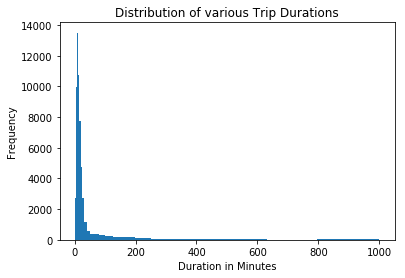

In [21]:
# Here we plot the distribution of trip durations.
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
plt.hist(data = bike_copy , x = 'duration_min', bins = binedges )
plt.title('Distribution of various Trip Durations')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency');

As we can see from the graph the above plot is right-screwed, with a long tail on the right. Therefore, the  next step is to apply a logarithmic transformation to x-axis.

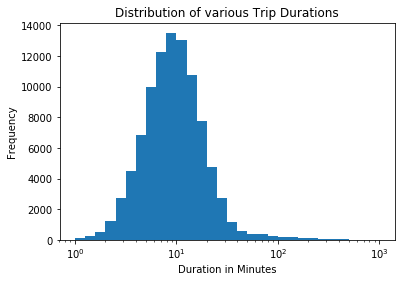

In [22]:
# Here we plot the distribution of trip durations.
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
plt.hist(data = bike_copy , x = 'duration_min', bins = binedges )
plt.title('Distribution of various Trip Durations')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.xscale('log');

From the graph we can tell that most people like to go for short trips of about 10 mins.

#### Bivariate Exploration 

- First we will take a look at how the age affects the duration time

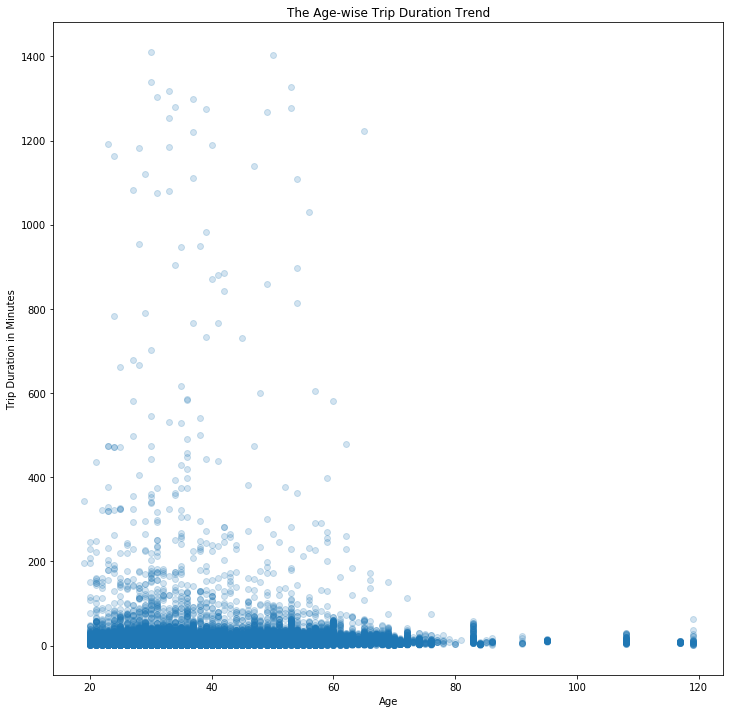

In [24]:
# how does the age affect the duration time 
plt.figure(figsize = [12,12]) # Makes the figure enlarged for better visualization 
plt.scatter(data = bike_copy , x = 'member_age' , y = 'duration_min' , alpha = 0.2 )
plt.title('The Age-wise Trip Duration Trend')
plt.xlabel('Age')
plt.ylabel('Trip Duration in Minutes');

While we can see some trend with increasing age and decreasing trip duration time, the graph is extremely difficult to visualize. Thus, in the next step we will group the ages of the members, for better clarity. 

In [25]:
# Grouping the ages of the members in 7 categories
bins = [18, 30, 40, 50, 60, 70, 80, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
bike_copy['agerange'] = pd.cut(bike_copy.member_age, bins, labels = labels,include_lowest = True)
bike_copy['agerange'].value_counts()

30-39    36715
18-29    22062
40-49    15943
50-59     9051
60-69     2446
70-79      461
80+        285
Name: agerange, dtype: int64

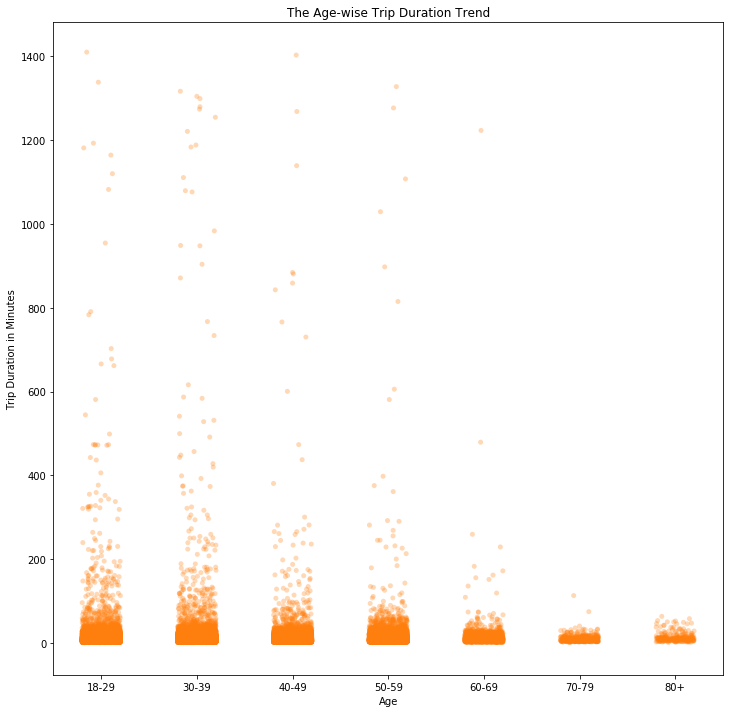

In [27]:
# Now let's observe the age ranges vs the trip durations
plt.figure(figsize = [12,12]) # Makes the figure enlarged for better visualization 
base_color = sns.color_palette()[1]
sns.stripplot(data = bike_copy , x = 'agerange' , y = 'duration_min', alpha = 0.3, jitter = 0.2, color = base_color)
plt.title('The Age-wise Trip Duration Trend')
plt.xlabel('Age')
plt.ylabel('Trip Duration in Minutes');

- This graph clearly proves that with increasing age the duration of trip decreases, as it is expected. 
- Between 18- 29 and 30-39 the trip durations and the number of trips are higher. 
- We have one person between the age of 60 - 69 with trip duration above 1200 minutes. We can't be sure this is an outlier,     because he/she may be a really fit person !!

- Is there any correlation between age and the duration of trips ?

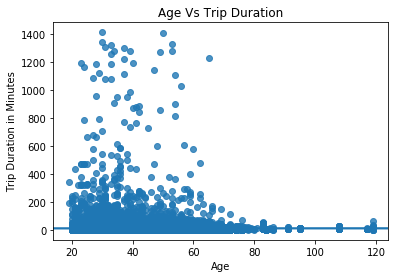

In [32]:
# Checking if there is any corelation between age and the time duration. 
sns.regplot(data = bike_copy , x = 'member_age' , y = 'duration_min');
plt.xlabel('Age')
plt.ylabel('Trip Duration in Minutes')
plt.title('Age Vs Trip Duration');

There is no positive or negative corelation between age and the duration of trips.

#### Multivariate Exploration

First we will take a look at between differents sexes how likely the members are willing to share their bike data

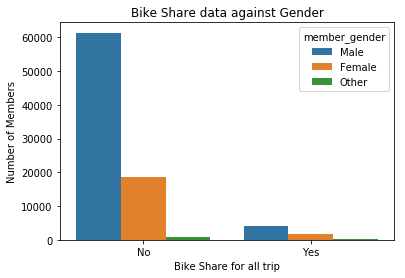

In [28]:
# Looking at how likely the members are willing to share their bike trip data
sns.countplot(data = bike_copy , x = 'bike_share_for_all_trip' , hue = 'member_gender');
plt.xlabel('Bike Share for all trip')
plt.ylabel('Number of Members');
plt.title('Bike Share data against Gender');

In general memebers are more likely to not share their trip data. Also we can see more Males share their data than Females. 

What is the impact or dependency of age and trip duration insights on whether a user is a subscriber or a customer?

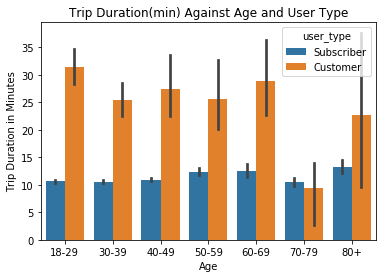

In [29]:
# Checking how the trip duration is affected by  age and user type
sns.barplot(data = bike_copy , x = 'agerange' , y = 'duration_min', hue = 'user_type');
plt.title('Trip Duration(min) Against Age and User Type');
plt.xlabel('Age')
plt.ylabel('Trip Duration in Minutes');

- Customers in almost all age groups have longer trip durations than subscribers.
- The only exception being between the ages 70-79 where subscribers have slightly higher trip duration. 

Does gender play any role in the duration/number of trips between different age groups? 

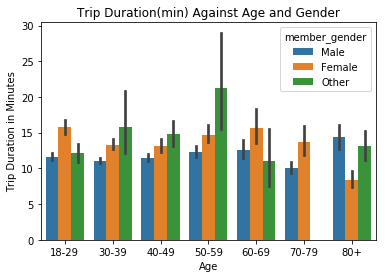

In [30]:
# Checking how the trip duration is affected by  age and user type
sns.barplot(data = bike_copy , x = 'agerange' , y = 'duration_min', hue = 'member_gender');
plt.title('Trip Duration(min) Against Age and Gender');
plt.xlabel('Age')
plt.ylabel('Trip Duration in Minutes');

- It is interesting to note that in almost all age groups Females have longer Trip duration's than males. 
- The exception being in 80 +
- Also there are a lot of rows with Other as a gender Category. 

#### Conclusions 
- Most people like to go for short trips of about 10 mins.
- Increasing age the duration of trip decreases, as it is expected.
- Between 18- 29 and 30-39 the trip durations and the number of trips are higher.
- We have one person between the age of 60 - 69 with trip duration above 1200 minutes. We can't be sure this is an outlier, because he/she may be a really fit person !!
- There is no positive or negative corelation between age and the duration of trips.
- In general members are more likely to not share their trip data. Also more Males share their data than Females.
- Customers in almost all age groups have longer trip durations than subscribers.
- The only exception being between the ages 70-79 where subscribers have slightly higher trip duration.
- In almost all age groups Females have longer Trip duration's than males.The exception being in 80 +
- There are a lot of rows with Other as a gender Category.

Thank you !